In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/insurance.csv')

# Basic info
print("=== BASIC INFO ===")
print(f"Total people: {len(df)}")
print(f"Columns: {list(df.columns)}")
print("\nFirst few rows:")
print(df.head())

=== BASIC INFO ===
Total people: 1338
Columns: ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

First few rows:
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [2]:
print("=== MISSING DATA CHECK ===")
missing_data = df.isnull().sum()
print("Missing values in each column:")
print(missing_data)

# Check data types
print(f"\nData types:")
print(df.dtypes)

=== MISSING DATA CHECK ===
Missing values in each column:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Data types:
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


In [3]:
print(f"Duplicate rows: {df.duplicated().sum()}")

df = df.drop_duplicates()
print(f"After removing duplicates: {df.shape[0]} rows")

Duplicate rows: 1
After removing duplicates: 1337 rows


In [4]:
print("\n=== KEY STATISTICS ===")
print(f"Average age: {df['age'].mean():.1f} years")
print(f"Average BMI: {df['bmi'].mean():.1f}")
print(f"Average charges: ${df['charges'].mean():.2f}")
print(f"Highest charge: ${df['charges'].max():.2f}")
print(f"Lowest charge: ${df['charges'].min():.2f}")
print(f"average children: {df['children'].mean():.1f}")

print(f"\nSmokers: {len(df[df['smoker'] == 'yes'])} people ({len(df[df['smoker'] == 'yes'])/len(df)*100:.1f}%)")
print(f"Non-smokers: {len(df[df['smoker'] == 'no'])} people ({len(df[df['smoker'] == 'no'])/len(df)*100:.1f}%)")


=== KEY STATISTICS ===
Average age: 39.2 years
Average BMI: 30.7
Average charges: $13279.12
Highest charge: $63770.43
Lowest charge: $1121.87
average children: 1.1

Smokers: 274 people (20.5%)
Non-smokers: 1063 people (79.5%)


In [7]:
smoker_avg = df[df['smoker'] == 'yes']['charges'].mean()
non_smoker_avg = df[df['smoker'] == 'no']['charges'].mean()
print(f"Average charges for smokers: ${smoker_avg:.2f}")
print(f"Average charges for non-smokers: ${non_smoker_avg:.2f}")
print(f"Smokers pay {smoker_avg/non_smoker_avg:.1f}x more")


Average charges for smokers: $32050.23
Average charges for non-smokers: $8440.66
Smokers pay 3.8x more


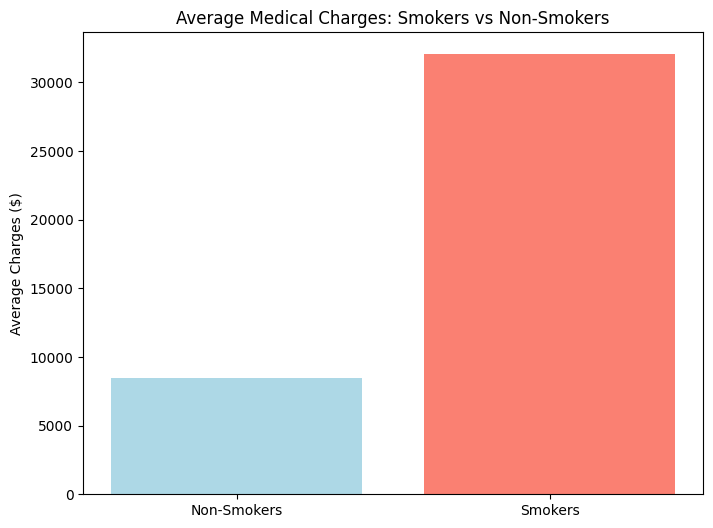

In [19]:
plt.figure(figsize=(8, 6))
plt.bar(['Non-Smokers', 'Smokers'], [non_smoker_avg, smoker_avg], color=['lightblue', 'salmon'])
plt.ylabel('Average Charges ($)')
plt.title('Average Medical Charges: Smokers vs Non-Smokers')
plt.show()

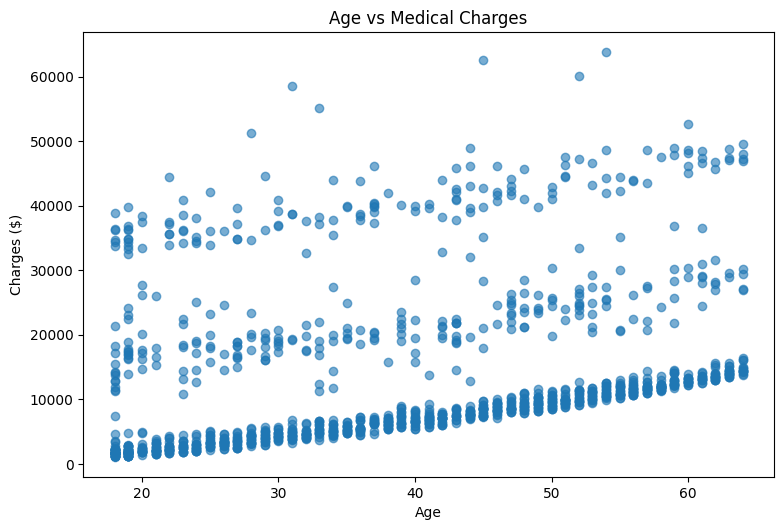

In [20]:

plt.figure(figsize=(15, 10))


plt.subplot(2, 2, 1)
plt.scatter(df['age'], df['charges'], alpha=0.6)
plt.xlabel('Age')
plt.ylabel('Charges ($)')
plt.title('Age vs Medical Charges')

plt.tight_layout()
plt.show()

In [8]:
print("\n=== REGIONAL DIFFERENCES ===")
region_stats = df.groupby('region').agg({
    'charges': 'mean',
    'bmi': 'mean',
    'age': 'mean'
}).round(2)

print(region_stats)


=== REGIONAL DIFFERENCES ===
            charges    bmi    age
region                           
northeast  13406.38  29.17  39.27
northwest  12450.84  29.20  39.26
southeast  14735.41  33.36  38.94
southwest  12346.94  30.60  39.46


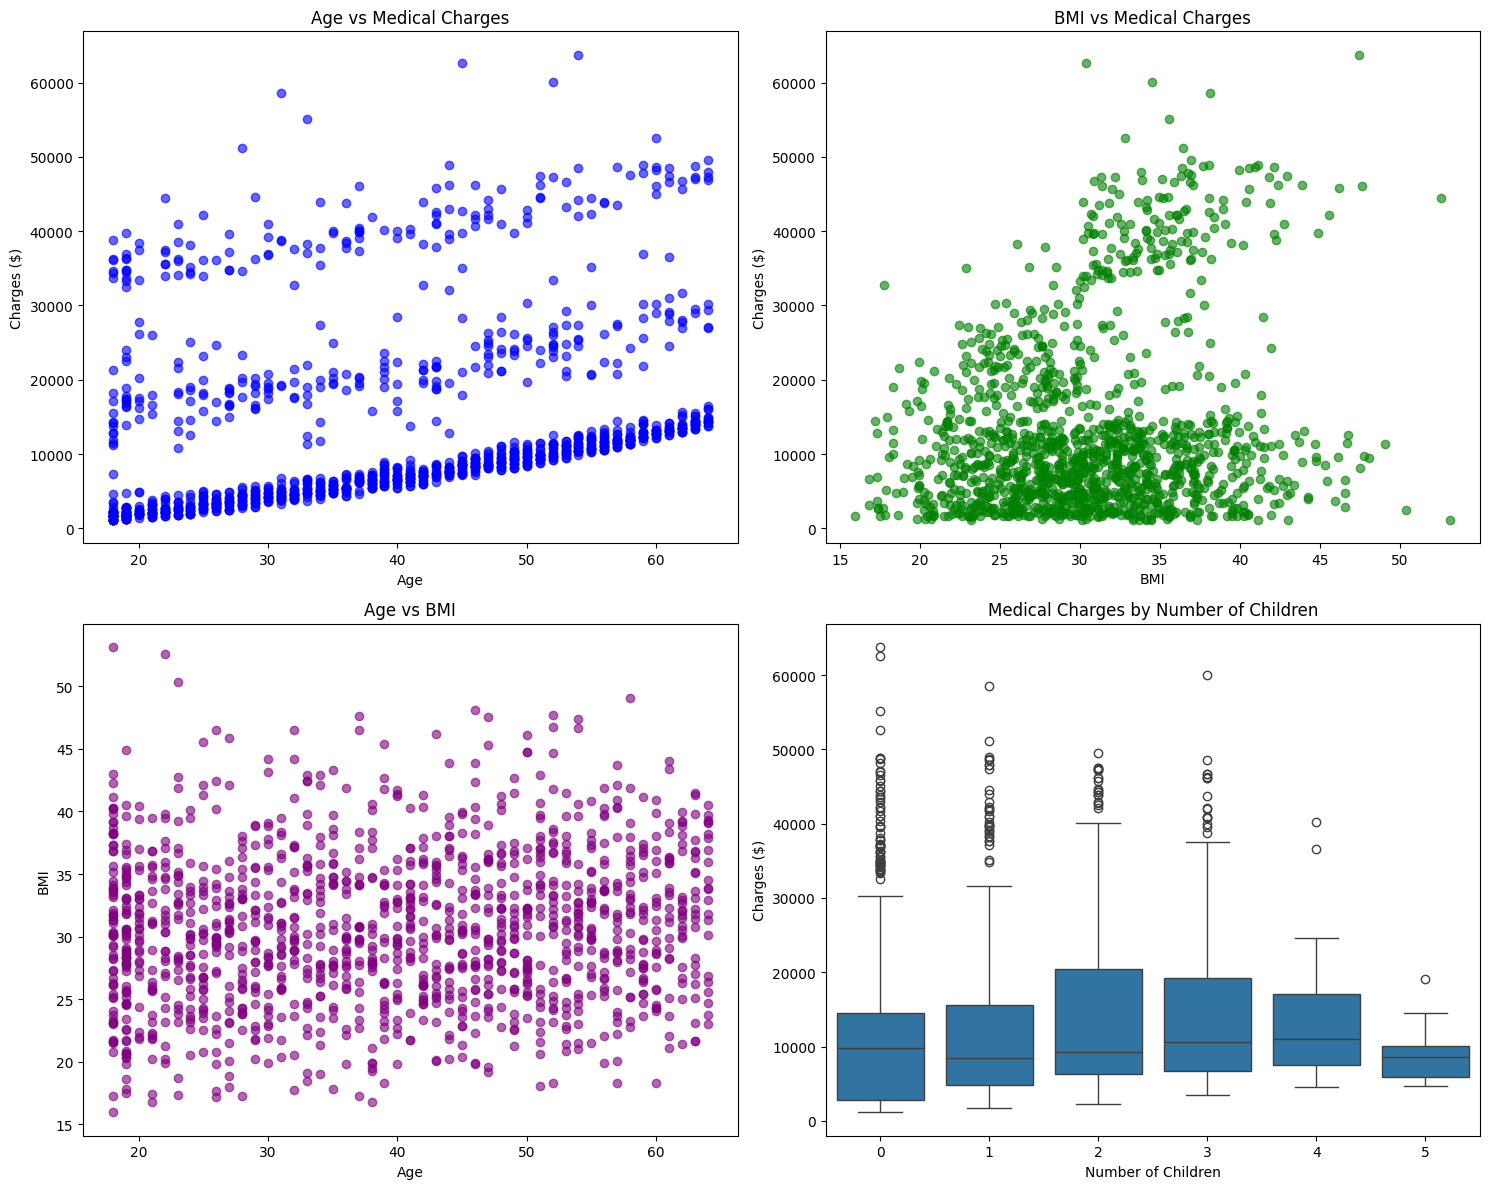

In [9]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

axes[0,0].scatter(df['age'], df['charges'], alpha=0.6, c='blue')
axes[0,0].set_xlabel('Age')
axes[0,0].set_ylabel('Charges ($)')
axes[0,0].set_title('Age vs Medical Charges')

axes[0,1].scatter(df['bmi'], df['charges'], alpha=0.6, c='green')
axes[0,1].set_xlabel('BMI')
axes[0,1].set_ylabel('Charges ($)')
axes[0,1].set_title('BMI vs Medical Charges')

axes[1,0].scatter(df['age'], df['bmi'], alpha=0.6, c='purple')
axes[1,0].set_xlabel('Age')
axes[1,0].set_ylabel('BMI')
axes[1,0].set_title('Age vs BMI')

sns.boxplot(data=df, x='children', y='charges', ax=axes[1,1])
axes[1,1].set_xlabel('Number of Children')
axes[1,1].set_ylabel('Charges ($)')
axes[1,1].set_title('Medical Charges by Number of Children')

plt.tight_layout()
plt.show()

In [10]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

df_normalized = df.copy()

scaler_standard = StandardScaler()
numerical_cols = ['age', 'bmi', 'charges']
df_normalized[['age_standard', 'bmi_standard', 'charges_standard']] = scaler_standard.fit_transform(df[numerical_cols])

scaler_minmax = MinMaxScaler()
df_normalized[['age_minmax', 'bmi_minmax', 'charges_minmax']] = scaler_minmax.fit_transform(df[numerical_cols])

print("=== NORMALIZATION RESULTS ===")
print("Original vs Standardized vs Min-Max scaled:")
print(df_normalized[['age', 'age_standard', 'age_minmax']].head())

=== NORMALIZATION RESULTS ===
Original vs Standardized vs Min-Max scaled:
   age  age_standard  age_minmax
0   19     -1.440418    0.021739
1   18     -1.511647    0.000000
2   28     -0.799350    0.217391
3   33     -0.443201    0.326087
4   32     -0.514431    0.304348


In [22]:
print("\n=== COMPARISON: BEFORE VS AFTER NORMALIZATION ===")
original_stats = df[numerical_cols].describe()
standard_stats = df_normalized[['age_standard', 'bmi_standard', 'charges_standard']].describe()
minmax_stats = df_normalized[['age_minmax', 'bmi_minmax', 'charges_minmax']].describe()

print("Original data statistics:")
print(original_stats.loc[['mean', 'std', 'min', 'max']])

print("\nStandardized data (mean=0, std=1):")
print(standard_stats.loc[['mean', 'std', 'min', 'max']].round(6))

print("\nMin-Max scaled data (range 0-1):")
print(minmax_stats.loc[['mean', 'std', 'min', 'max']].round(6))


=== COMPARISON: BEFORE VS AFTER NORMALIZATION ===
Original data statistics:
            age        bmi       charges
mean  39.222139  30.663452  13279.121487
std   14.044333   6.100468  12110.359656
min   18.000000  15.960000   1121.873900
max   64.000000  53.130000  63770.428010

Standardized data (mean=0, std=1):
      age_standard  bmi_standard  charges_standard
mean     -0.000000     -0.000000         -0.000000
std       1.000374      1.000374          1.000374
min      -1.511647     -2.411119         -1.004247
max       1.764921      3.684136          4.170826

Min-Max scaled data (range 0-1):
      age_minmax  bmi_minmax  charges_minmax
mean    0.461351    0.395573        0.194055
std     0.305312    0.164123        0.193306
min     0.000000    0.000000        0.000000
max     1.000000    1.000000        1.000000


In [12]:
df_encoded = df_normalized.copy()
df_encoded['sex_encoded'] = df_encoded['sex'].map({'female': 0, 'male': 1})
df_encoded['smoker_encoded'] = df_encoded['smoker'].map({'no': 0, 'yes': 1})
df_encoded['region_encoded'] = df_encoded['region'].map({'southwest': 0, 'southeast': 1, 'northwest': 2, 'northeast': 3})

print("=== ENCODED DATA ===")
print(df_encoded.head())

=== ENCODED DATA ===
   age     sex     bmi  children smoker     region      charges  age_standard  \
0   19  female  27.900         0    yes  southwest  16884.92400     -1.440418   
1   18    male  33.770         1     no  southeast   1725.55230     -1.511647   
2   28    male  33.000         3     no  southeast   4449.46200     -0.799350   
3   33    male  22.705         0     no  northwest  21984.47061     -0.443201   
4   32    male  28.880         0     no  northwest   3866.85520     -0.514431   

   bmi_standard  charges_standard  age_minmax  bmi_minmax  charges_minmax  \
0     -0.453160          0.297857    0.021739    0.321227        0.251611   
1      0.509422         -0.954381    0.000000    0.479150        0.009636   
2      0.383155         -0.729373    0.217391    0.458434        0.053115   
3     -1.305052          0.719104    0.326087    0.181464        0.333010   
4     -0.292456         -0.777499    0.304348    0.347592        0.043816   

   sex_encoded  smoker_encode

In [23]:
import numpy as np

smoker_stats = df_encoded.groupby('smoker_encoded')['charges'].agg(['mean', 'count'])
print("\n💰 SMOKING IMPACT:")
print(f"Non-smokers (0): ${smoker_stats.loc[0, 'mean']:.0f}")
print(f"Smokers (1): ${smoker_stats.loc[1, 'mean']:.0f}")
print(f"-> Smokers pay {smoker_stats.loc[1, 'mean']/smoker_stats.loc[0, 'mean']:.1f}x more!")

df_encoded['bmi_category'] = pd.cut(df_encoded['bmi'],
                                   bins=[0, 18.5, 25, 30, 100],
                                   labels=['Underweight', 'Normal', 'Overweight', 'Obese'])
bmi_stats = df_encoded.groupby('bmi_category')['charges'].mean()
print("\n⚖️ BMI IMPACT:")
for category, cost in bmi_stats.items():
    print(f"{category}: ${cost:.0f}")


children_stats = df_encoded.groupby('children')['charges'].mean()
print("\n👨‍👩‍👧‍👦 CHILDREN IMPACT:")
for kids, cost in children_stats.items():
    print(f"{kids} children: ${cost:.0f}")

region_stats = df_encoded.groupby('region_encoded')['charges'].mean()
region_names = {0: 'southwest', 1: 'southeast', 2: 'northwest', 3: 'northeast'}
print("\n🌍 REGION IMPACT:")
for region_code, cost in region_stats.items():
    print(f"{region_names[region_code]}: ${cost:.0f}")


💰 SMOKING IMPACT:
Non-smokers (0): $8441
Smokers (1): $32050
-> Smokers pay 3.8x more!

⚖️ BMI IMPACT:
Underweight: $8658
Normal: $10435
Overweight: $10998
Obese: $15581

👨‍👩‍👧‍👦 CHILDREN IMPACT:
0 children: $12385
1 children: $12731
2 children: $15074
3 children: $15355
4 children: $13851
5 children: $8786

🌍 REGION IMPACT:
southwest: $12347
southeast: $14735
northwest: $12451
northeast: $13406


/tmp/ipython-input-3742306053.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bmi_stats = df_encoded.groupby('bmi_category')['charges'].mean()


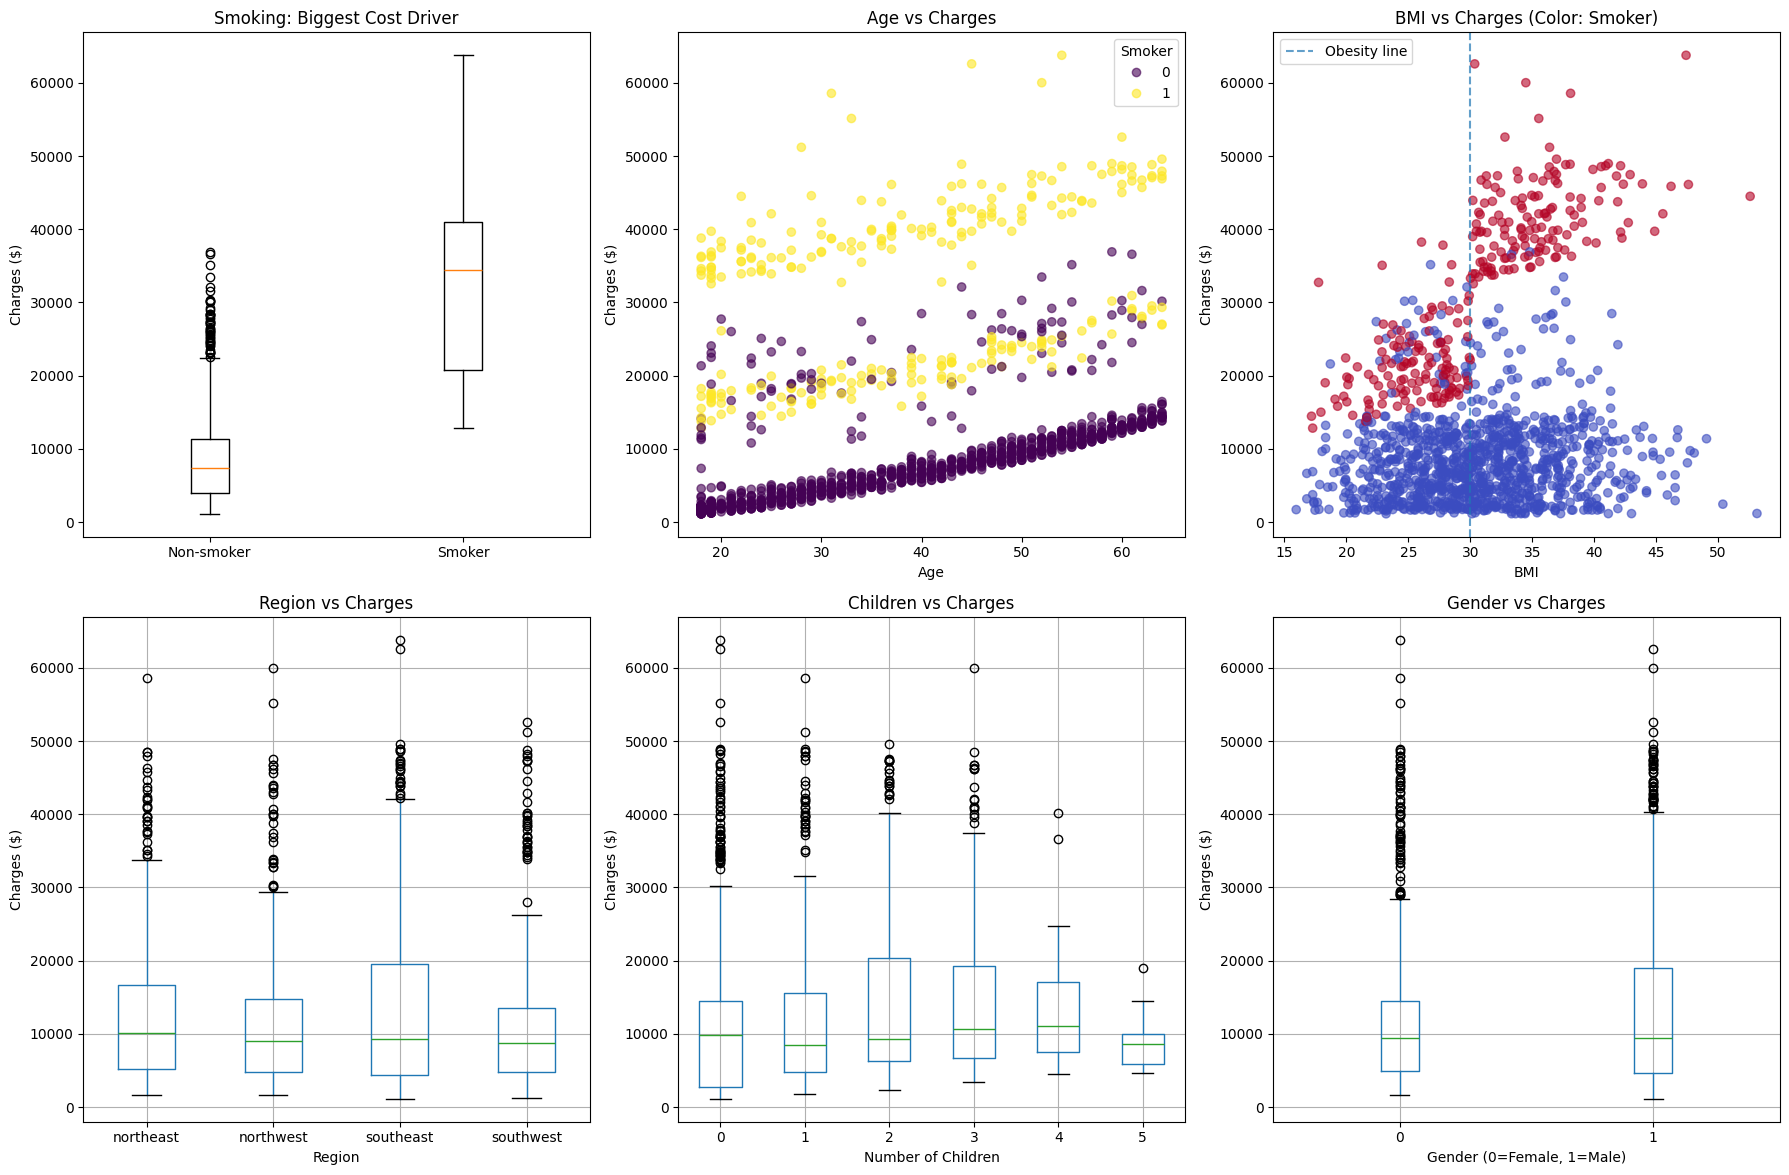

In [14]:

fig, axes = plt.subplots(2, 3, figsize=(18, 12))

axes[0,0].boxplot([df_encoded[df_encoded['smoker_encoded'] == 0]['charges'],
                   df_encoded[df_encoded['smoker_encoded'] == 1]['charges']])
axes[0,0].set_xticklabels(['Non-smoker', 'Smoker'])
axes[0,0].set_ylabel('Charges ($)')
axes[0,0].set_title('Smoking: Biggest Cost Driver')

scatter = axes[0,1].scatter(df_encoded['age'], df_encoded['charges'], c=df_encoded['smoker_encoded'], cmap='viridis', alpha=0.6)
axes[0,1].set_xlabel('Age')
axes[0,1].set_ylabel('Charges ($)')
axes[0,1].set_title('Age vs Charges')
axes[0,1].legend(*scatter.legend_elements(), title="Smoker")

scatter = axes[0,2].scatter(df_encoded['bmi'], df_encoded['charges'], c=df_encoded['smoker_encoded'], cmap='coolwarm', alpha=0.6)
axes[0,2].set_xlabel('BMI')
axes[0,2].set_ylabel('Charges ($)')
axes[0,2].set_title('BMI vs Charges (Color: Smoker)')
axes[0,2].axvline(x=30, linestyle='--', alpha=0.7, label='Obesity line')
axes[0,2].legend()

df_encoded.boxplot(column='charges', by='region', ax=axes[1,0])
axes[1,0].set_title('Region vs Charges')
axes[1,0].set_xlabel('Region')
axes[1,0].set_ylabel('Charges ($)')

df_encoded.boxplot(column='charges', by='children', ax=axes[1,1])
axes[1,1].set_title('Children vs Charges')
axes[1,1].set_xlabel('Number of Children')
axes[1,1].set_ylabel('Charges ($)')

df_encoded.boxplot(column='charges', by='sex_encoded', ax=axes[1,2])
axes[1,2].set_title('Gender vs Charges')
axes[1,2].set_xlabel('Gender (0=Female, 1=Male)')
axes[1,2].set_ylabel('Charges ($)')

plt.suptitle('')
plt.tight_layout()
plt.show()

In [18]:
import numpy as np
print("\n1. SMOKING × REGION INTERACTION:")
for region_code in [0, 1, 2, 3]:
    region_name = region_names[region_code]
    subset = df_encoded[df_encoded['region_encoded'] == region_code]
    smoker_cost = subset[subset['smoker_encoded'] == 1]['charges'].mean()
    non_smoker_cost = subset[subset['smoker_encoded'] == 0]['charges'].mean()

    print(f"   {region_name} -> Smokers: ${smoker_cost:.0f} | Non-smokers: ${non_smoker_cost:.0f}")

print("\n2. SMOKING × BMI INTERACTION:")
for bmi_cat in ['Normal', 'Overweight', 'Obese']:
    subset = df_encoded[df_encoded['bmi_category'] == bmi_cat]
    smoker_cost = subset[subset['smoker_encoded'] == 1]['charges'].mean()
    non_smoker_cost = subset[subset['smoker_encoded'] == 0]['charges'].mean()

    if not np.isnan(smoker_cost):
        print(f"   {bmi_cat:12} -> Smokers: ${smoker_cost:.0f} | Non-smokers: ${non_smoker_cost:.0f}")

print("\n3. REGION × BMI INTERACTION:")
print("Average charges by region and BMI category:")
region_bmi_interaction = df_encoded.groupby(['region', 'bmi_category'])['charges'].mean().unstack()
print(region_bmi_interaction.round(0))


1. SMOKING × REGION INTERACTION:
   southwest -> Smokers: $32269 | Non-smokers: $8019
   southeast -> Smokers: $34845 | Non-smokers: $8032
   northwest -> Smokers: $30192 | Non-smokers: $8582
   northeast -> Smokers: $29674 | Non-smokers: $9166

2. SMOKING × BMI INTERACTION:
   Normal       -> Smokers: $19942 | Non-smokers: $7735
   Overweight   -> Smokers: $22491 | Non-smokers: $8226
   Obese        -> Smokers: $41693 | Non-smokers: $8866

3. REGION × BMI INTERACTION:
Average charges by region and BMI category:
bmi_category  Underweight   Normal  Overweight    Obese
region                                                 
northeast          8914.0  11317.0     10811.0  16566.0
northwest          9223.0  10001.0     11432.0  14396.0
southeast             NaN  13124.0     10863.0  16282.0
southwest          7026.0   7431.0     10826.0  14778.0


/tmp/ipython-input-1433656096.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  region_bmi_interaction = df_encoded.groupby(['region', 'bmi_category'])['charges'].mean().unstack()


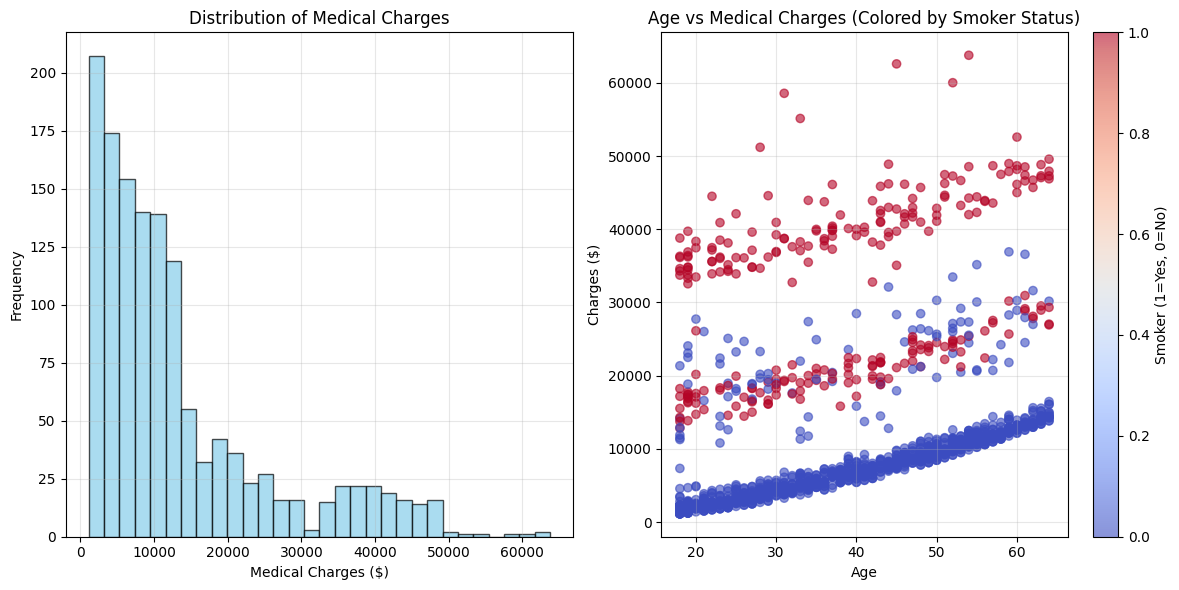

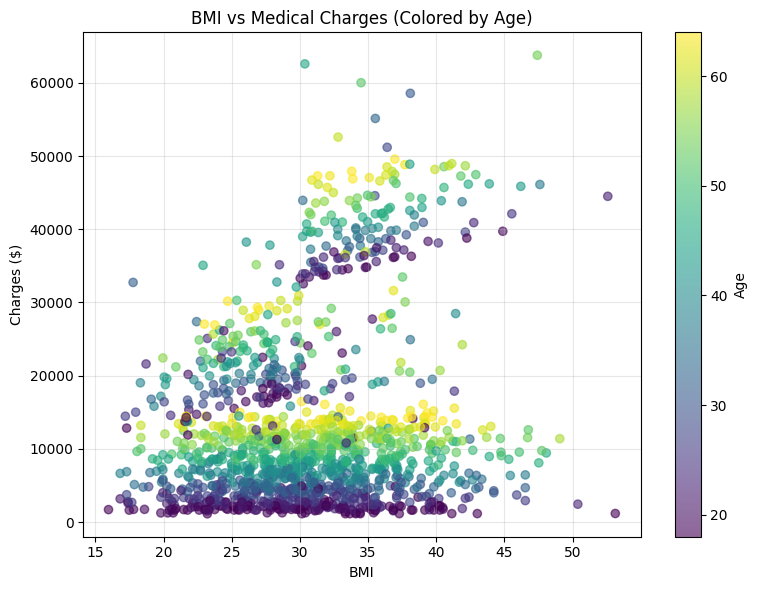

In [92]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(df['charges'], bins=30, alpha=0.7)
plt.xlabel('Medical Charges ($)')
plt.ylabel('Frequency')
plt.title('Distribution of Medical Charges')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
scatter = plt.scatter(df['age'], df['charges'], c=df['smoker'].map({'yes': 1, 'no': 0}),
                     alpha=0.6, cmap='coolwarm')
plt.xlabel('Age')
plt.ylabel('Charges ($)')
plt.title('Age vs Medical Charges (Colored by Smoker Status)')
plt.colorbar(scatter, label='Smoker (1=Yes, 0=No)')
plt.grid(True, alpha=0.3)


plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(df['bmi'], df['charges'], alpha=0.6, c=df['age'], cmap='viridis')
plt.xlabel('BMI')
plt.ylabel('Charges ($)')
plt.title('BMI vs Medical Charges (Colored by Age)')
plt.colorbar(label='Age')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

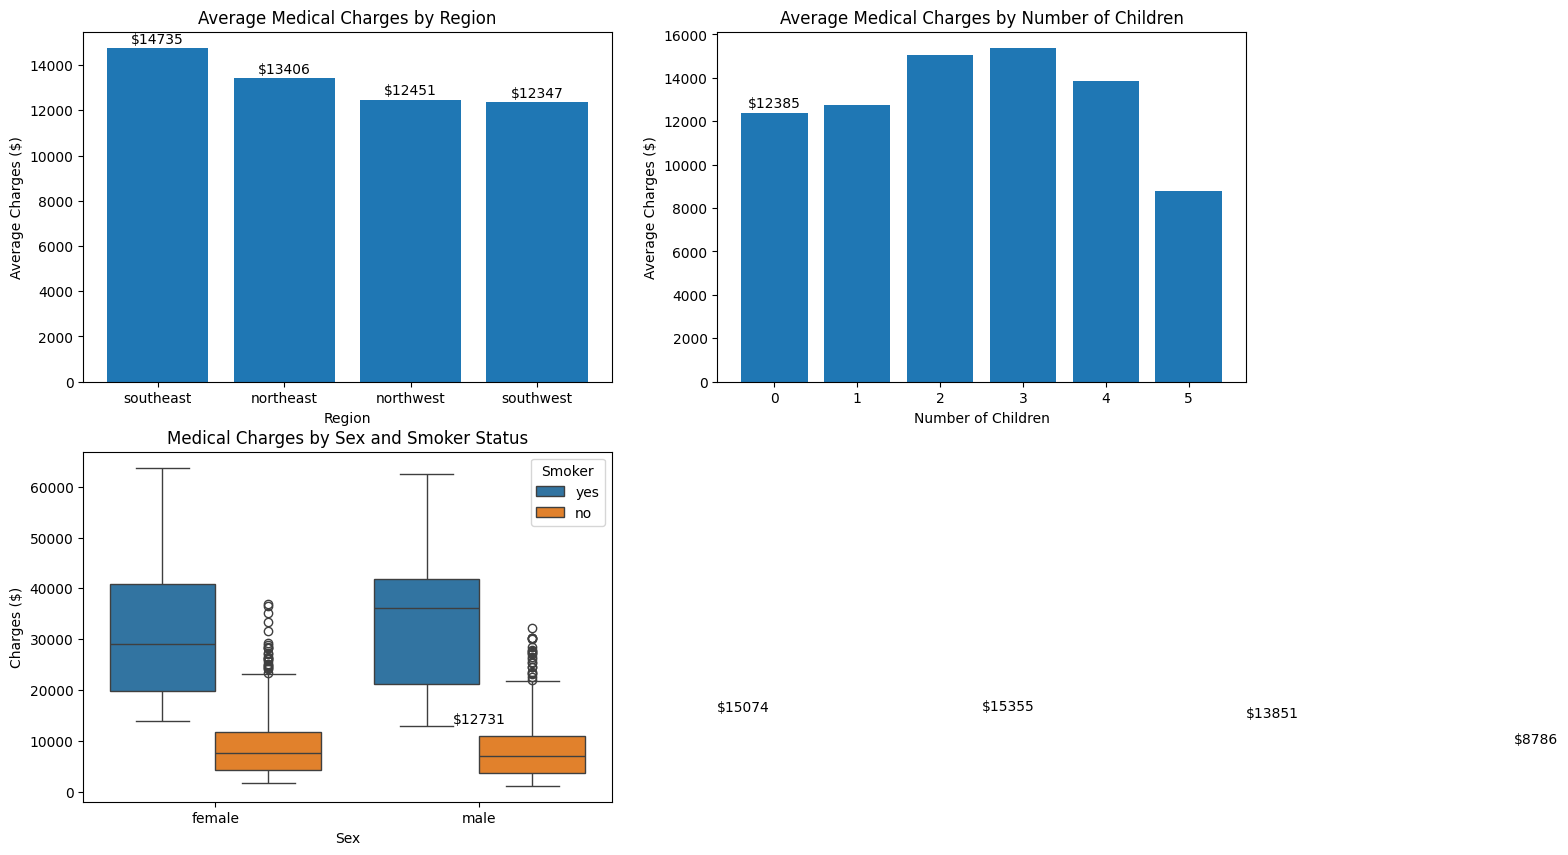

In [58]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
region_charges = df.groupby('region')['charges'].mean().sort_values(ascending=False)
plt.bar(region_charges.index, region_charges.values)
plt.xlabel('Region')
plt.ylabel('Average Charges ($)')
plt.title('Average Medical Charges by Region')
for i, v in enumerate(region_charges.values):
    plt.text(i, v + 100, f'${v:.0f}', ha='center', va='bottom')

plt.subplot(2, 2, 2)
children_charges = df.groupby('children')['charges'].mean()
plt.bar(children_charges.index, children_charges.values)
plt.xlabel('Number of Children')
plt.ylabel('Average Charges ($)')
plt.title('Average Medical Charges by Number of Children')
for i, v in enumerate(children_charges.values):
    plt.text(i, v + 100, f'${v:.0f}', ha='center', va='bottom')

    plt.subplot(2, 2, 3)
sns.boxplot(x='sex', y='charges', hue='smoker', data=df)
plt.xlabel('Sex')
plt.ylabel('Charges ($)')
plt.title('Medical Charges by Sex and Smoker Status')
plt.legend(title='Smoker')




Text(0.5, 1.0, 'Correlation Heatmap')

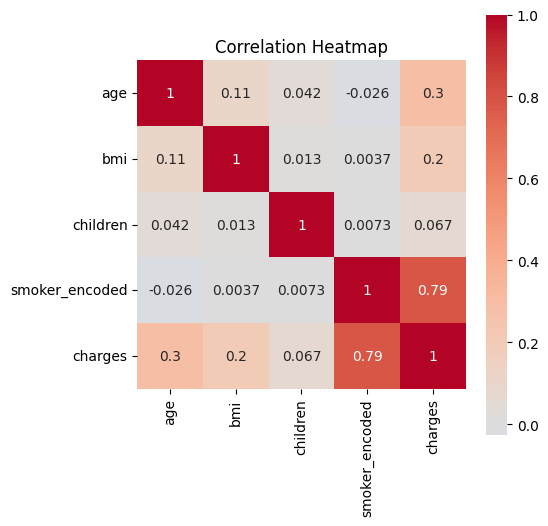

In [62]:
plt.figure(figsize=(18, 12))


plt.subplot(2, 3, 1)
correlation_matrix = df_encoded[['age', 'bmi', 'children', 'smoker_encoded', 'charges']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, square=True)
plt.title('Correlation Heatmap')

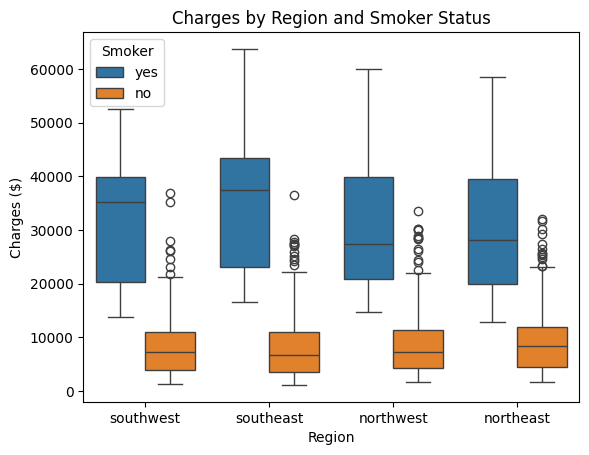

In [70]:
plt.subplot(1, 1, 1)
sns.boxplot(x='region', y='charges', hue='smoker', data=df)
plt.xlabel('Region')
plt.ylabel('Charges ($)')
plt.title('Charges by Region and Smoker Status')
plt.legend(title='Smoker')

Text(0, 0.5, 'Average BMI')

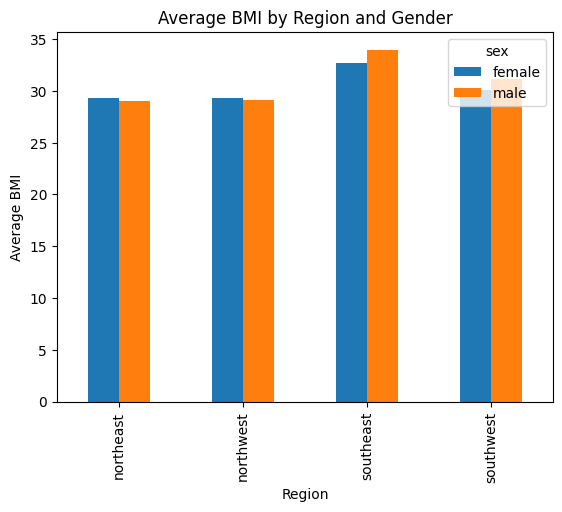

In [76]:
plt.subplot(1, 1, 1)
bmi_by_region_gender = df.groupby(['region', 'sex'])['bmi'].mean().unstack()
bmi_by_region_gender.plot(kind='bar', ax=plt.gca())
plt.title('Average BMI by Region and Gender')
plt.xlabel('Region')
plt.ylabel('Average BMI')
